In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go


### Read Data

In [246]:
df = pd.read_csv('/Users/andishetavakkoli/Documents/notebook/ml-web-app/developer-salary-prediction/src/data/survey_results_public.csv')

In [248]:
df.head(2)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0


In [228]:
df.shape

(89184, 84)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

### Visualization

In [64]:
def plot_line_chart(df, column, line=''):
    if line == '':
        line = df[column].value_counts().keys()[0:20]
    data = df[column].value_counts()[0:20]
    fig = px.line(x=line, y=data)
    fig.show()

def plot_bar_chart(df, column, line=''):
    if line == '':
        line = df[column].value_counts().keys()[0:20]
    data = df[column].value_counts()[0:20]
    fig = px.bar(x=line, y=data)
    fig.show()

def plot_pie_chart(df, column, line=''):
    if line == '':
        line = df[column].value_counts().keys()[0:20]
    data = df[column].value_counts()[0:20]
    fig = px.pie(name=line, df=data)
    fig.show()


In [249]:
line = df['Country'].value_counts().keys()[0:20]

In [250]:
line

Index(['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'France', 'Poland', 'Netherlands', 'Australia', 'Brazil', 'Italy',
       'Spain', 'Sweden', 'Switzerland', 'Russian Federation',
       'Czech Republic', 'Austria', 'Israel', 'Belgium', 'Turkey'],
      dtype='object')

In [129]:
def plot_bar_chart(df, column, line=''):
    if line == '':
        line = df[column].value_counts().index[0:20]
    data = df[column].value_counts()[0:20]
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, x=line, y=data)
    
    # Customize tick color to white
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
   
    # plt.xlabel('Country', color='white')
    # plt.ylabel('Count', color='white')
    # plt.title('Top 20 Countries by Count', color='white')
    plt.show()

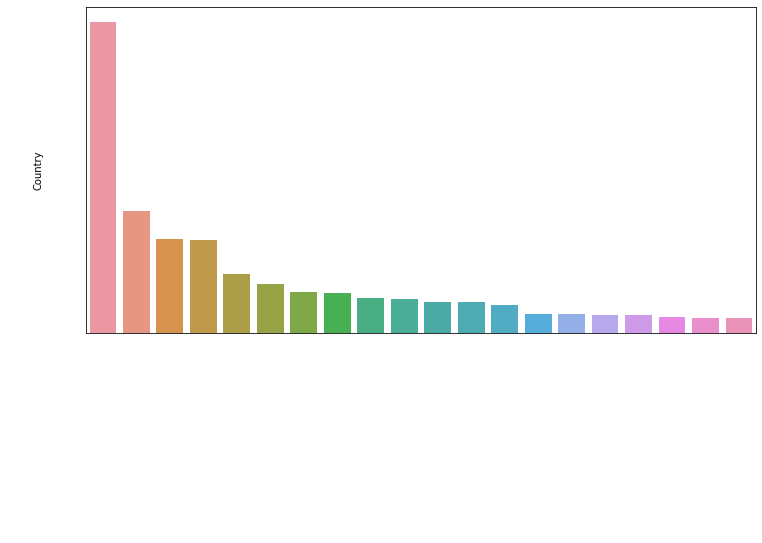

In [130]:
plot_bar_chart(df, 'Country')

In [123]:
def plot_pie_chart(df, column, line=''):
    if line == '':
        line = df[column].value_counts().index[0:20]
    data = df[column].value_counts()[0:20]
    plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
    plt.pie(data, labels=line, autopct='%1.1f%%', startangle=140)

    # Plot a pie chart

    # plt.title('Top 20 Countries by Count', color='white')

    # plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


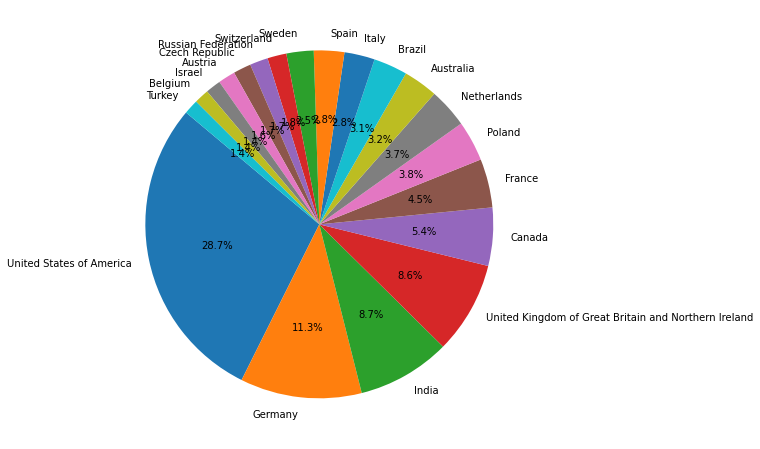

In [124]:
plot_pie_chart(df, 'Country')

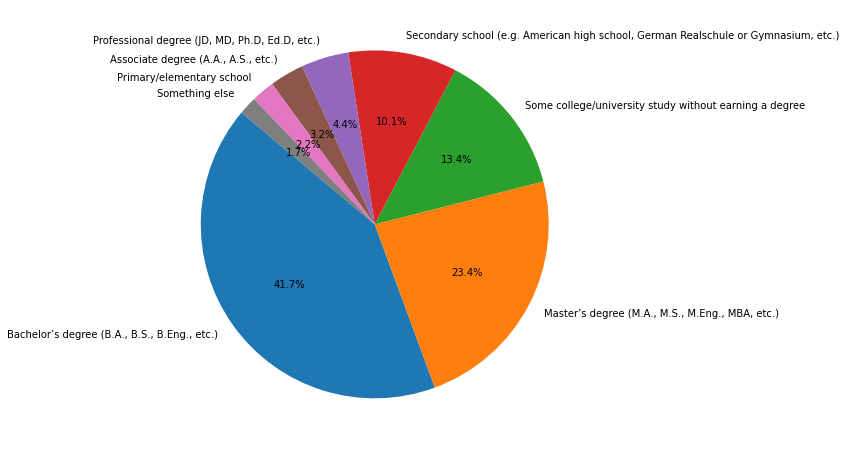

In [134]:
plot_pie_chart(df,'EdLevel')

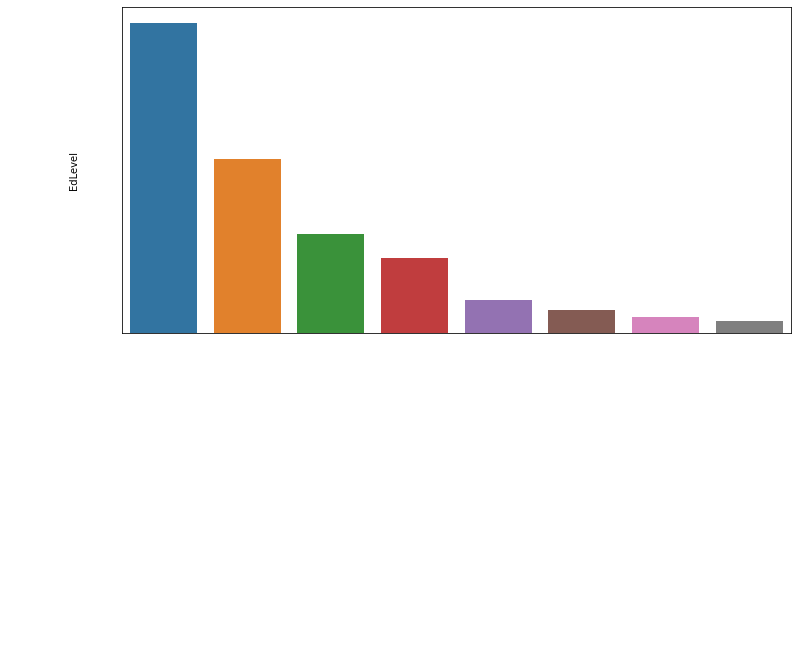

In [131]:
plot_bar_chart(df,'EdLevel')



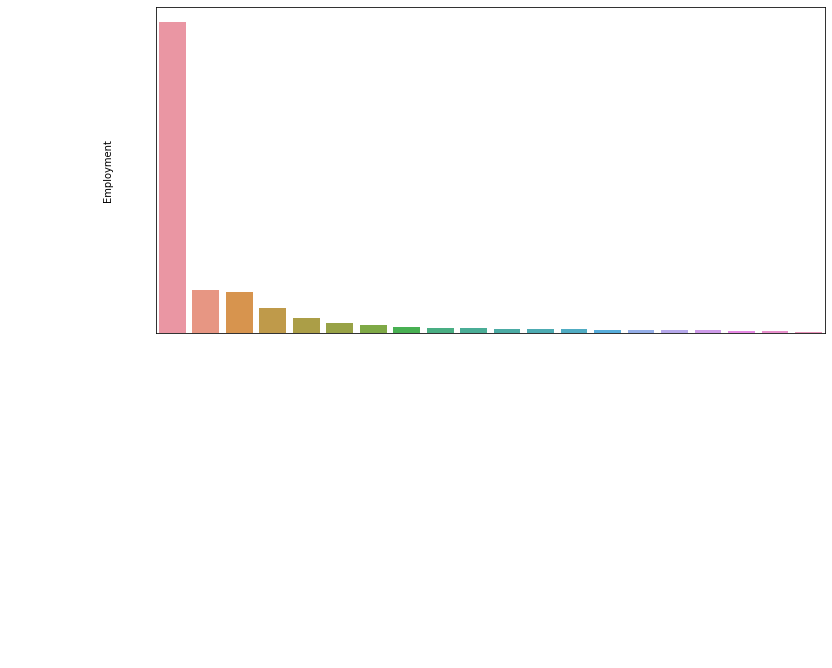

In [132]:
plot_bar_chart(df,'Employment')

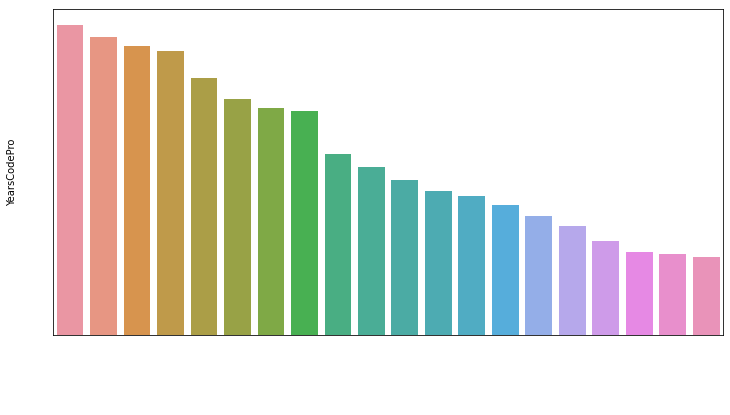

In [133]:
plot_bar_chart(df,'YearsCodePro')

### Preprocessing

In [251]:
df = df[['Age','Country', 'EdLevel', 'YearsCodePro', 'ConvertedCompYearly']]

In [274]:
df = df.rename({'ConvertedCompYearly': 'Salary'}, axis=1)

In [275]:
df.sample(3)

,Age,Country,EdLevel,YearsCodePro,Salary
45744,25-34 years old,Australia,Some college/university study without earning ...,6,105766.0
23203,18-24 years old,Colombia,Some college/university study without earning ...,3,19341.0
7577,35-44 years old,United States of America,Some college/university study without earning ...,18,200000.0


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           89184 non-null  object 
 1   Country       87973 non-null  object 
 2   EdLevel       87973 non-null  object 
 3   YearsCodePro  66136 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


In [255]:
df = df[df['Salary'].notnull()]

In [236]:
df.sample(5)

,Age,Country,EdLevel,YearsCodePro,Salary
25302,35-44 years old,United States of America,"Associate degree (A.A., A.S., etc.)",17,200000.0
59690,25-34 years old,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,51403.0
4621,25-34 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,90000.0
57938,18-24 years old,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,30292.0
60526,45-54 years old,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",29,124138.0


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           48019 non-null  object 
 1   Country       48019 non-null  object 
 2   EdLevel       48019 non-null  object 
 3   YearsCodePro  47825 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [257]:
df.dropna(inplace=True)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47825 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           47825 non-null  object 
 1   Country       47825 non-null  object 
 2   EdLevel       47825 non-null  object 
 3   YearsCodePro  47825 non-null  object 
 4   Salary        47825 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [259]:
df.isna().sum()

Age             0
Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [260]:
columns = ['Age','Country', 'EdLevel', 'YearsCodePro', 'ConvertedCompYearly']

In [261]:
def get_unique_col_values(df):

    unique_values_dict = {}  # Initialize an empty dictionary to store unique values

    for column in df:
        if df[column].dtypes == 'object':
            unique_values_dict[column] = df[column].unique().tolist()

    return unique_values_dict


In [262]:
get_unique_col_values(df)

{'Age': ['25-34 years old',
  '45-54 years old',
  '35-44 years old',
  'Under 18 years old',
  '55-64 years old',
  '18-24 years old',
  '65 years or older',
  'Prefer not to say'],
 'Country': ['United States of America',
  'Philippines',
  'United Kingdom of Great Britain and Northern Ireland',
  'Finland',
  'Australia',
  'Netherlands',
  'Germany',
  'Sweden',
  'France',
  'Albania',
  'Nigeria',
  'Spain',
  'South Africa',
  'Brazil',
  'Portugal',
  'Italy',
  'Bangladesh',
  'Canada',
  'Argentina',
  'Switzerland',
  'Sri Lanka',
  'Lithuania',
  'Serbia',
  'Cyprus',
  'India',
  'Egypt',
  'Latvia',
  'Russian Federation',
  'Greece',
  'Austria',
  'Norway',
  'Singapore',
  'Turkey',
  'Croatia',
  'Poland',
  'Iran, Islamic Republic of...',
  'Kosovo',
  'Nepal',
  'Slovenia',
  'China',
  'Belgium',
  'Romania',
  'Denmark',
  'Hungary',
  'Republic of Korea',
  'Viet Nam',
  'Israel',
  'Ukraine',
  'Nomadic',
  'Dominican Republic',
  'Isle of Man',
  'Estonia',
  '

In [263]:
df['Country'].value_counts()


United States of America                                11847
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3522
Canada                                                   2095
India                                                    1850
                                                        ...  
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Guyana                                                      1
Antigua and Barbuda                                         1
Name: Country, Length: 171, dtype: int64

In [264]:
def category_cutoff(df, cutoff):

    categories = df['Country'].value_counts()
    category_map = {}
    for i in range(len(categories)):
        if  categories.values[i] >= cutoff:
            category_map[categories.index[i]] = categories.index[i]
        else:
            category_map[categories.index[i]] = 'other'
    return category_map



In [265]:
df['Country'] = df['Country'].map(category_cutoff(df, 100))


In [267]:
df['Country'].value_counts()

United States of America                                11847
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3522
other                                                    2354
Canada                                                   2095
India                                                    1850
France                                                   1793
Netherlands                                              1359
Poland                                                   1265
Brazil                                                   1249
Australia                                                1206
Spain                                                    1142
Sweden                                                   1055
Italy                                                    1010
Switzerland                                               660
Austria                                                   531
Denmark 

In [ ]:
df = df[df["Salary"] <= 200000]
df = df[df['Country'] != 'other']

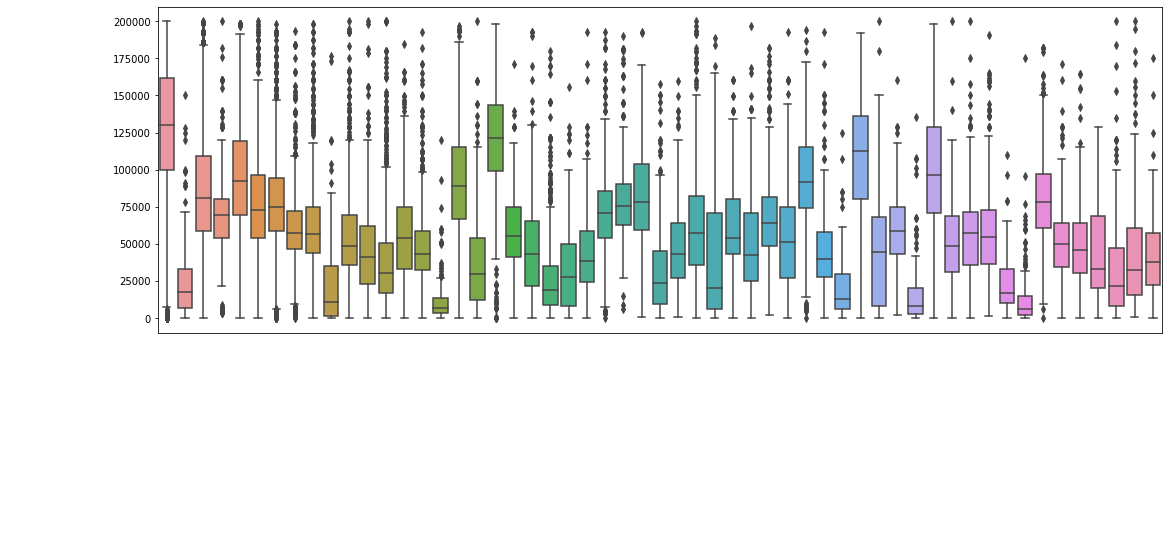

In [292]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=df, x="Country", y="Salary")

ax.tick_params(axis='x', colors='white')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Country', color='white')
plt.ylabel('Count', color='white')

plt.show()


In [294]:
df.head()

,Age,Country,EdLevel,YearsCodePro,Salary
3,25-34 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
4,25-34 years old,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,23456.0
5,35-44 years old,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,35-44 years old,United States of America,Some college/university study without earning ...,3,135000.0
7,25-34 years old,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,80000.0


In [303]:
df['YearsCodePro'].unique()

array([ 7. ,  4. , 21. ,  3. , 15. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,
        5. , 13. , 16. , 28. , 30. , 11. ,  8. , 24. , 40. , 17. , 29. ,
       25. , 23. , 12. , 20. , 18. , 50. , 19. , 27. , 43. , 26. ,  1. ,
       38. , 33. , 22. , 35. , 31. , 34. , 32. , 37. , 42. , 39. , 36. ,
       41. , 44. , 48. , 45. , 46. , 47. , 49. ])

In [301]:
def clean_tenure(x):
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 50
    return float(x)


In [302]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_tenure)

In [306]:
df['EdLevel'].unique()

array(['Bachelor', 'less than Bachelor', 'Master', 'Post Grad'],
      dtype=object)

In [304]:
def clean_education(x):
    if 'Bachelor' in x:
        return 'Bachelor'
    if 'Master' in x:
        return 'Master'
    if 'Professional' in x:
        return 'Post Grad'
    else:
        return 'less than Bachelor'

In [305]:
df['EdLevel'] = df['EdLevel'].apply(clean_education)

## Modeling

In [309]:
X = df.drop(columns='Salary', axis=1)
y = df[['Salary']]

In [311]:
y

,Salary
3,156000.0
4,23456.0
5,96828.0
6,135000.0
7,80000.0
...,...
89160,28625.0
89162,50719.0
89167,15752.0
89170,64254.0
